# Statistics Introduction Exercises

A few basic exercises mostly taken from [here](https://mdonega.github.io/hep-datanalysis-jb/preface.html).

## Probability and Probability Distributions

1. For each of the following rates (0.1, 0.5, 1, 5) generate 10k events from a Poisson distribution and plot it

In [1]:
import numpy as np
import matplotlib.pyplot as plt

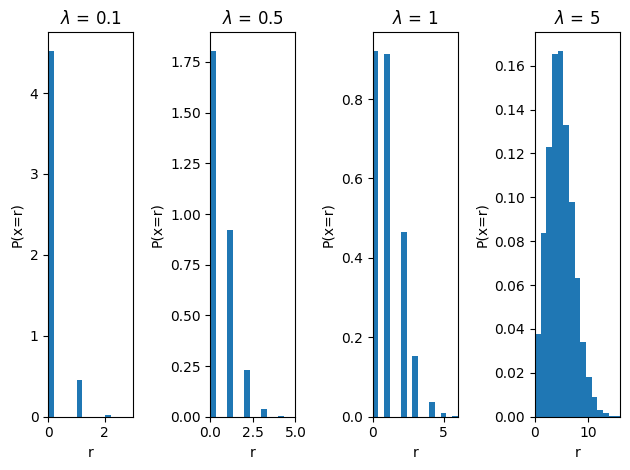

In [26]:
lamd = [0.1, 0.5, 1, 5]
noev = 10000

fig, ax = plt.subplots(1, len(lamd))
for i, lam in enumerate(lamd):
    n = np.random.poisson(lam, noev)
    ax[i].hist(n, bins=15, density=True)
    ax[i].set_xlim(0, np.max(n))
    ax[i].set_title(f"$\lambda$ = {lam}")
    ax[i].set_xlabel("r")
    ax[i].set_ylabel("P(x=r)")
plt.tight_layout();

2. Draw PDF and CDF (for arbitrary values of their parameters) for the following distributions:

2. a. gaussian

In [12]:
from scipy.stats import norm

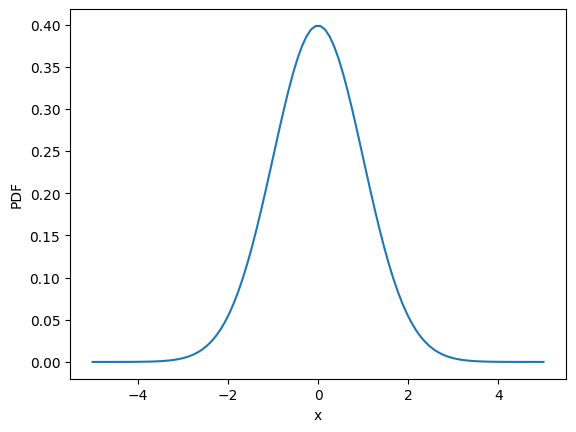

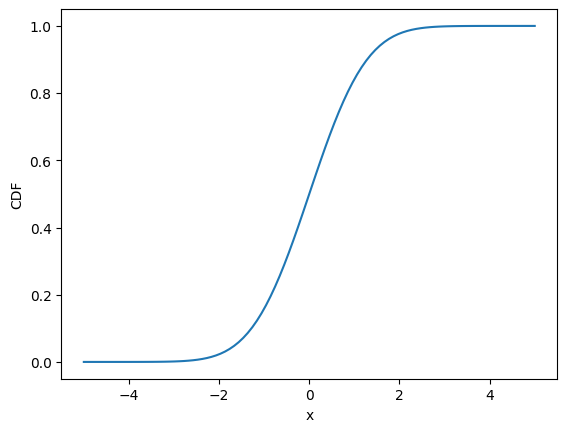

In [22]:
x = np.linspace(-5, 5, 100)

pdf = norm.pdf(x, loc=0, scale=1)

# Plot the PDF
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("PDF")
plt.show()

cdf = norm.cdf(x, loc=0, scale=1)

# Plot the CDF
plt.plot(x, cdf)
plt.xlabel("x")
plt.ylabel("CDF")
plt.show()

2. b. $\chi^2$

In [23]:
from scipy.stats import chi2

(0.0, 0.5)

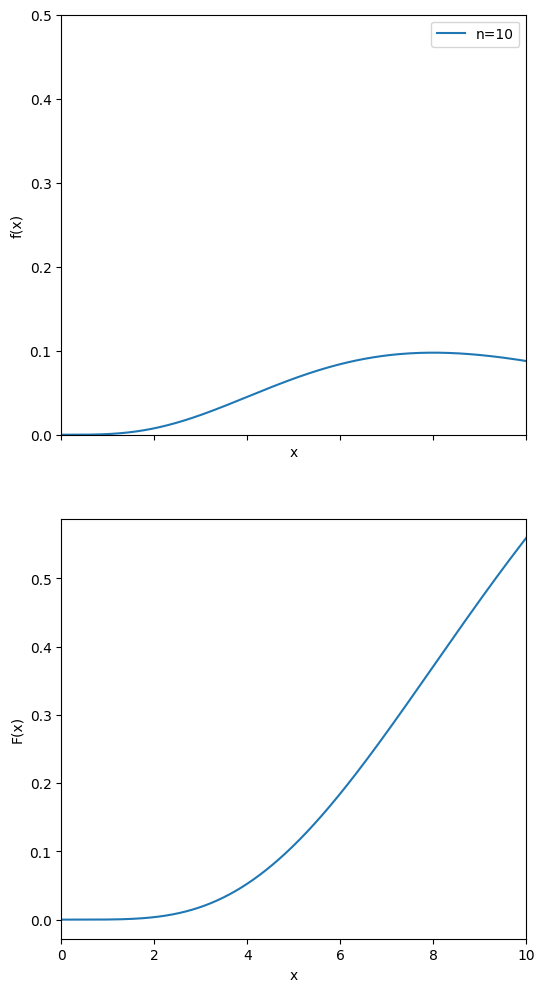

In [28]:
df=10
size = 10000
limits = (0, 10)

fig, (axf, axF) = plt.subplots(2, 1, figsize=(6,12), sharex=True)

frozen = chi2(df)
x = np.linspace(*limits, size)
fx = frozen.pdf(x)
Fx = frozen.cdf(x)
axf.plot(x, fx, linestyle="-", label=f"n={df}")
axF.plot(x, Fx, linestyle="-", label=f"n={df}")
axf.legend()
axf.set_xlabel("x")
axF.set_xlabel("x")
axf.set_ylabel("f(x)")
axF.set_ylabel("F(x)")
axf.set_xlim(*limits)
axF.set_xlim(*limits)
axf.set_ylim(0, 0.5)

2. c. Log-normal

3. Visually demonstrate an application of the Central Limit Theorem (CLT): the distribution of the sum of multiple independent uniform random variables tends to a gaussian as more variables are added.

## Likelihood

Generate 10k events from a gaussian pdf with $\mu = 3$ and $\sigma = 2.3$.
Then, define a negative log-likelihood (NLL) and apply the maximum likelihood method (NLL minimization) to find the values $\hat{\mu}$ and $\hat{\sigma}$ that maximize the likelihood (minimize the NLL). These values are estimators of $\mu$ and $\sigma$.
Assign an uncertainty to the estimators using the inverse of the hessian around the minimum and the graphic method (values of $\hat{\theta}$ for which $\ln L$ decreases by 0.5).
In the graphic method case, reduce the free parameters to only one ($\mu$) by setting $\sigma$ to its true value.

**Hint**: in the first case, you can minimize the NLL using [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) and access the inverse of the Hessian using the `hess_inv` method of the result returned.

## Hypothesis Testing

### Average Body Temperature

Consider a population of many adults. A researcher hypothesized that the average adult body temperature is lower than the often-advertised 37 $^\circ$. That is, the researcher wants an answer to the question: "Is the average adult body temperature really 37 $^\circ$? Or is it lower?".

In order to answer the question, he selects a random sample of 100 adults. The average body temperature of the sampled adults is 36.7 degrees, with a standard deviation of 1.4.

#### Part 1

What can the reasearcher say about his initial hypothesis?

In order to answer, use the following hints and answer these questions:

- the test statistic you can use is $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$ (where $\bar{x}$ is the mean of the sample, $\mu$ is the population mean, $s$ is the standard deviation of the sample and $n$ is the size of the sample), whose PDF is a t-student with $n - 1$ degrees of freedom
- what is the null hypothesis? and the alternative?
- can the researcher reject the null hypothesis with a significance level of 0.05? and 0.01?

Can the null hypothesys be rejected with a significance level of 5% (CL of 95%)?

Can the null hypothesys be rejected with a significance level of 1% (CL of 99%)?

#### Part 2

Repeat the exercise, but instead of using the t-student PDF sample the distribution from what you know about the null hypothesis. You can consider the temperature of the population following a gaussian distribution with mean 37 (as stated above) and standard deviation 0.4 (one of the values found in medical literature).

### Coin

We suspect a coin might be biased towards heads. We thus toss the coin n = 10 times and observe X = 8. 
Based on this experiment, what can we say about the fairness of the coin?
**Hint**: use a binomial to model the pdf.